# Векторизация, Numba

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Оптимизация выполнения кода, векторизация, Numba"
* https://numba.pydata.org/numba-doc/latest/user/5minguide.html
* https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types
* https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html
* https://numba.pydata.org/numba-doc/latest/user/vectorize.html


## Задачи для совместного разбора

1. Сгенерируйте массив `A` из `N=1млн` случайных целых чисел на отрезке от 0 до 1000. Пусть `B[i] = A[i] + 100`. Посчитайте среднее значение массива `B`. Ускорьте вычисления при помощи numba

In [139]:
import numpy as np
import pandas as pd
from numba import jit, njit, vectorize
import numba
from typing import Union
import json

In [140]:
A = np.random.randint(0, 1000, size=(1000000,))

In [141]:
def f1(A):
    acc, cnt = 0, 0
    for x in A:
        acc += x + 100
        cnt += 1
    return acc / cnt

2. Напишите функцию, которая возвращает сумму всех чисел от 0 до x-1. Создайте массив, заполненный случайными целыми неотрицательными числами и примените функцию к каждому элементу массива.

3. Приведите все слова из столбца key к верхнему регистру

In [142]:
import pandas as pd
import string
import numpy as np

def create_df(allow_nan=False, N=2_000_000):
    df = pd.DataFrame(np.random.randint(0, 10, (N, 4)), columns=[f"col{i}" for i in range(4)])
    names = ["Apple",  "Banana",  "Apricot",  "Atemoya",  "Avocados",  "Blueberry",  "Blackcurrant",  "Ackee",  "Cranberry",  "Cantaloupe",  "Cherry",  "Black sapote/Chocolate pudding fruit",  "Dragonrfruit",  "Dates",  "Cherimoya",  "Buddha’s hand fruit",  "Finger Lime",  "Fig",  "Coconut",]
    if allow_nan:
        names.append(None)
    df["key"] = np.random.choice(names, N, replace=True)
    return df

In [143]:
df = create_df(allow_nan=False, N=2_000_000)

4\. Для каждой строки рассчитайте разность между значениями col0 и col1, если в столбце col3 стоит четное число, и разность между col0 и col2 в противном случае.

In [144]:
df = create_df(allow_nan=False, N=500_000).select_dtypes('number')

## Лабораторная работа 2

__При решении данных задач не подразумевается использования циклов или генераторов Python в ходе работы с пакетами `numpy` и `pandas`, если в задании не сказано обратного. Решения задач, в которых для обработки массивов `numpy` или структур `pandas` используются явные циклы (без согласования с преподавателем), могут быть признаны некорректными и не засчитаны.__

В файлах `recipes_sample.csv` и `reviews_sample.csv` (__ЛР 2__) находится информация об рецептах блюд и отзывах на эти рецепты соответственно. Загрузите данные из файлов в виде `pd.DataFrame` с названиями `recipes` и `reviews`. Обратите внимание на корректное считывание столбца(ов) с индексами. Приведите столбцы к нужным типам.

In [145]:
recipes =  pd.read_csv('recipes_sample.csv')
reviews = pd.read_csv('reviews_sample.csv')
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN


In [146]:
reviews

,Unnamed: 0,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...,...
126691,1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
126692,158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
126693,1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
126694,453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


In [147]:
recipes['submitted'] = pd.to_datetime(recipes['submitted'])

## Numba

В файле `rating_predictions.json` хранятся данные о рейтингах рецептов и прогнозных значениях рейтингов для этого рецепта, полученных при помощи модели машинного обучения. 

Напишите несколько версий функции (см. [MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)) для расчета среднего абсолютного процентного отклонения значения рейтинга отзыва на рецепт от прогнозного значения рейтинга для данного рецепта. 


Замечание 1: в формуле MAPE под $A_t$ понимается рейтинг из отзыва $t$, под $F_t$ - прогнозное значения рейтинга отзыва $t$.

Замечание 2: в результате работы функций должно получиться одно число - MAPE для всего набора данных.

In [148]:
rat= json.load(open('rating_predictions.json'))
rat

[{'rating': 5.0, 'prediction': 4.944444444444445},
 {'rating': 5.0, 'prediction': 4.4375},
 {'rating': 5.0, 'prediction': 4.7272727272727275},
 {'rating': 5.0, 'prediction': 4.3545454545454545},
 {'rating': 5.0, 'prediction': 4.888888888888889},
 {'rating': 5.0, 'prediction': 4.4855072463768115},
 {'rating': 3.0, 'prediction': 4.666666666666667},
 {'rating': 5.0, 'prediction': 4.594936708860759},
 {'rating': 5.0, 'prediction': 5.0},
 {'rating': 5.0, 'prediction': 4.4},
 {'rating': 4.0, 'prediction': 4.0},
 {'rating': 5.0, 'prediction': 5.0},
 {'rating': 5.0, 'prediction': 4.666666666666667},
 {'rating': 5.0, 'prediction': 3.6666666666666665},
 {'rating': 5.0, 'prediction': 4.666666666666667},
 {'rating': 4.0, 'prediction': 4.403381642512077},
 {'rating': 2.0, 'prediction': 3.5},
 {'rating': 4.0, 'prediction': 4.75},
 {'rating': 5.0, 'prediction': 5.0},
 {'rating': 3.0, 'prediction': 4.0},
 {'rating': 5.0, 'prediction': 5.0},
 {'rating': 5.0, 'prediction': 4.090909090909091},
 {'rating'

№1\.1 Создайте два списка `A_list` и `F_list` на основе файла `rating_predictions.json`. Напишите функцию `mape_lists` без использования векторизованных операций и методов массивов `numpy` и без использования `numba` (проитерируйтесь по спискам и вычислите суммарное значение MAPE для всех элементов, а потом усредните результат).

Измерьте время выполнения данной функции на входных данных `A_list` и `F_list`. Временем, затрачиваемым на создание списков, можно пренебречь.
    

In [149]:
A_list = [i['rating'] for i in rat]
F_list = [i['prediction'] for i in rat]

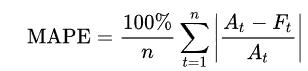

In [150]:
def mape_lists(A, F):
    mps = []
    for a, f in zip(A, F):
        mps.append(abs((a-f)/a))
        
    
    return sum(mps) / len(mps) * 100

In [151]:
%time mape_lists(A_list,F_list)

Wall time: 31 ms


13.325265503992636

In [152]:
%%timeit 
mape_lists(A_list,F_list)

36.7 ms ± 846 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


№1\.2. Создайте массивы `numpy` `A_array` и `F_array` на основе списков `A_list` и `F_list`. Напишите функцию `mape_numpy` с использованием векторизованных операций и методов массивов `numpy`.

Измерьте время выполнения данной функции на входных данных `A_array` и `F_array`. Временем, затрачиваемым на создание массивов, можно пренебречь.

In [153]:
A_array = np.array(A_list)
F_array = np.array(F_list)

In [154]:
def mape_numpy(A, F):
    A = np.array(A)
    B = np.array(F)
    
    return np.abs((A - F) / A).mean() * 100 # Возвращает модуль элементов массива

In [155]:
%%time
mape_numpy(A_array, F_array)

Wall time: 0 ns


13.32526550399145

№1\.3. Создайте объекты `numba.typed.List` `A_typed` и `F_typed` на основе списков `A_list` и `F_list`. Напишите функцию `mape_numba` без использования векторизованных операций и методов массивов `numpy`, но с использованием `numba`. 

Измерьте время выполнения данной функции на входных данных `A_typed` и `F_typed`. Временем, затрачиваемым на создание объектов `numba.typed.List`, можно пренебречь.

Измерьте время выполнения данной функции на входных данных `A_array` и `F_array`.

In [91]:
A_typed = numba.typed.List(A_list)
F_typed = numba.typed.List(F_list)

In [96]:
@njit
def mape_numba(A, F):
    dic = 0
    for a, f in zip(A, F):
        dic+=abs((a-f)/a)
        
    
    return dic/len(A)*100

In [97]:
mape_numba(A_typed, F_typed)

13.325265503992636

In [98]:
%%timeit
mape_numba(A_typed, F_typed)

716 µs ± 8.71 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [99]:
%%timeit
mape_numba(A_array, F_array)

130 µs ± 1.59 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Векторизация

Сайт-агрегатор устроил акцию: он дарит купоны на посещение ресторана тем пользователям, оставившим отзывы, идентификатор которых является _красивым числом_. Натуральное число называется _красивым_, если первая цифра числа совпадает с последней цифрой числа. 



№2\.1 Напишите функцию `is_pretty`, которая для каждого идентификатора пользователя из файла определяет, получит ли он подарок. Запрещается преобразовывать идентификатор пользователя к строке. Подтвердите корректность реализации, продемонстрировав примеры.

In [107]:
ids = reviews["user_id"].unique()

In [127]:
def is_pretty(n: int) -> bool:
    return n // (10 ** np.floor(np.log10(n))) == n % 10 #Можно вместо np.floor просто написать int, но тогда 2.2 не будет работать, там нужен одноразмерный array


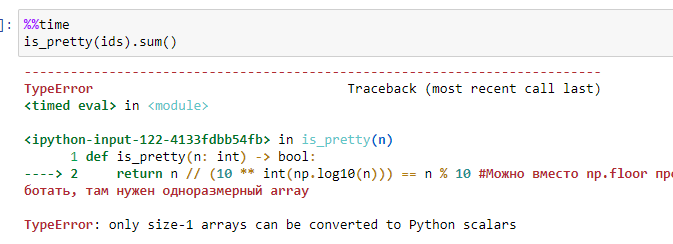

In [128]:
for i in ids:
    if is_pretty(i):
        print(i)

21752
114681
312493
2001031222
1782531
230102
240552
997559
578005
452034
156691
185721
842778
235982
722837
150281
496064
346413
16501
192581
861758
2434352
383853
415204
134011
641346
329753
1118321
425154
1637861
2378822
461834
2001037552
320843
8688
461724
2001257472
749097
18391
27922
174991
609026
1539571
324123
15521
70667
88378
337963
309923
291292
893268
179911
954139
129201
101381
148361
37903
38643
268272
144431
1620171
448204
2002286582
163281
427214
382203
98719
50555
382123
197201
26512
415084
57695
267572
49304
262312
625696
209092
118561
1182971
2001367892
29782
600146
1938861
1190411
66246
412994
1969401
67656
186071
121581
756627
142911
80778
2847412
2001536892
1802649821
227932
2506582
2736172
1105991
25792
41984
422514
2000365172
46134
2000252292
185991
2043132
986099
474474
347873
6536
435124
1550971
207472
206722
655596
1802849661
130531
573325
1802535091
217482
120611
1404661
33263
1157591
107651
311003
857748
395713
1122161
527375
9869
293582
840768
356713
65056

In [129]:
is_pretty(21752)

True

In [130]:
is_pretty(21753)

False

№2\.2 Посчитайте с помощью функции `is_pretty` количество пользователей, которые получат подарок. Выведите это количество на экран. Измерьте время расчетов для входных данных `ids`.

In [131]:
%%time
is_pretty(ids).sum()

Wall time: 2.05 ms


4389

In [156]:
%%time

count = 0
for i in ids:
    if is_pretty(i):
        count += 1

print(count)

4389
Wall time: 94.3 ms


№2\.3. При помощи декоратора `numpy.vectorize` создайте векторизованную версию функции `is_pretty`. Корректно использовав эту векторизованную функцию, посчитайте количество пользователей, которые получат подарок. Выведите это количество на экран. Измерьте время расчетов для входных данных `ids`.


In [169]:
@np.vectorize
def is_pretty(n) -> bool:
    return n // (10 ** np.floor(np.log10(n))) == n % 10

In [170]:
%%timeit
is_pretty(ids).sum()

219 ms ± 5.07 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


№2\.4. При помощи декоратора `numba.vectorize` создайте векторизованную версию функции `is_pretty`. Корректно использовав эту векторизованную функцию, посчитайте количество пользователей, которые получат подарок. Выведите это количество на экран. Измерьте время расчетов для входных данных `ids`.


In [166]:
@numba.vectorize
def is_pretty(n) -> bool:
    return n // (10 ** np.floor(np.log10(n))) == n % 10

In [167]:
%%time
is_pretty(ids).sum()

Wall time: 134 ms


4389

In [168]:
%%timeit
is_pretty(ids).sum()

4.45 ms ± 92.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
